## Identificación de valores atípicos


*Estimados de localización*

Vamos a utilizar un primer dataset para aprender a calcular estimados de locación usando pandas.

El dataset que usaremos en esta sesión contiene información acerca de propiedades que estuvieron (o están) en venta en la ciudad de Melbourne, Australia. El dataset contiene las características físicas de la propiedad, su locación, el tipo de vivienda que es y el precio de la propiedad.

Vamos a analizar la variable precio para entender cómo están distribuidos los precios de propiedades en esta ciudad.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../../datasets/melbourne_housing-clean.csv', index_col=0)
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


***La media o promedio***

La media o promedio se obtiene sumando todos los valores de un conjunto de datos numéricos y dividiéndolos entre la cantidad de valores que tenemos en nuestro conjunto.

Vamos a analizar la columna `price`. Veamos cuál es el "valor típico" obtenido usando la media (promedio):

In [4]:
df['price'].mean()

np.float64(1068141.895071269)

***La mediana***

La mediana se obtiene de la siguiente manera:

Primero ordenamos de manera ascendente nuestros datos
Luego tomamos el valor que está justo en medio de nuestra secuencia ordenada de valores.
Si nuestro conjunto tiene un número par de valores y por lo tanto no tiene un valor justo a la mitad de la secuencia, se toma el promedio de los dos valores que se encuentran a la mitad de la secuencia.
Ahora veamos el "valor típico" obtenido usando la mediana:

In [5]:
df['price'].median()

np.float64(895500.0)

***Media truncada***

La media truncada es un estimado de locación más robusto que el promedio y la mediana. Esto significa que es menos sensible a valores atípicos. La media truncada se obtiene de la siguiente manera:

1. Primero ordenamos nuestro conjunto de manera ascendente.
2. Después decidimos qué porcentaje de nuestros datos vamos a truncar. Los valores más comunes suelen variar entre 5% y 25%.
3. Divide el porcentaje acordado entre dos y elimina esa fracción de tus datos del inicio y del final de tu secuencia. Por ejemplo, si decides truncar un 5%, elimina el 2.5% de tus datos del inicio de tu secuencia y el otro 2.5% del final de tu secuencia.
4. Obtén el promedio de los valores restantes.

Afortunadamente, no tenemos que hacer esto manualmente. La librería `scipy` ya ofrece un método para obtener la media truncada fácilmente:

In [7]:
from scipy import stats

stats.trim_mean(df['price'], 0.1)

np.float64(973653.7960935823)

Si obtenemos el promedio y la mediana podemos observar que la distancia entre la media truncada y la mediana es menor que la distancia entre el promedio y la mediana. Esto podría ser indicador de que tenemos valores atípicos en nuestro conjunto. Ya aprendemos después cómo determinar si esto es cierto o no.

In [8]:
print(df['price'].mean())
print(df['price'].median())
print(stats.trim_mean(df['price'], 0.1))

1068141.895071269
895500.0
973653.7960935823


***Desviación estándar***

Para obtener la desviación estándar se llevan a cabo los siguientes pasos:

1. Primero se obtiene el promedio de nuestros datos.
2. Después sacamos todas las diferencias entre cada valor de nuesrto conjunto y nuestro valor típico.
3. Después elevamos todos los resultados al cuadrado.
4. Luego se suman todos estos valores.
5. Luego se dividen entre la cantidad de valores - 1.
6. Finalmente se saca la raíz cuadrada del valor resultante.

**Pandas** tiene un método con el que podemos calcular la desviación estándar rápidamente:

In [9]:
df['price'].std()

np.float64(643728.1914372843)

Entre mayor sea nuestro resultado quiere decir que nuestros datos están más dispersos (es decir, hay muchos datos que se alejan de nuestro valor típico); entre menor sea el resultado quiere decir que nuestros datos están menos dispersos (es decir, están más cerca de nuestro valor típico).

Obviamente hay que tomar en cuenta el rango de nuestros valores para determinar si nuestra desviación estándar es pequeña o grande. Por ejemplo, una desviación estándar de 10 es muy pequeña si nuestros valores tienen un rango de 1 000 000. En cambio, una desviación estándar de 10 es mucho mayor si nuestros valores tienen un rango de 40.

***Percentiles***

El percentil P es un valor que indica que por lo menos P% de los valores en el conjunto tienen este valor o un valor menor; mientras que (100-P)% de los valores tienen este valor o un valor mayor. Por ejemplo, para obtener el percentil 80 primero ordenamos nuestro conjunto de manera ascendente y después elegimos un valor de manera que el 80% de los valores en nuestro conjunto sean iguales o menores a ese valor.

En pandas, los percentiles están implementados como cuantiles, que es lo mismo que los percentiles pero en versión fracciones. Es decir, el percentil 80 es lo mismo que el cuantil 0.8.

In [10]:
df['price'].quantile(0.8)

np.float64(1440000.0)

En este caso, el 80% de los valores en nuestro conjunto de datos tienen un valor menor o igual a 1 440 000.

Como podrás ya haber imaginado, el valor mínimo equivale al percentil 0 y el valor máximo equivale al percentil 100, mientras que la mediana es exactamente igual que el percentil 50.

Sacando los percentiles podemos darnos una idea más o menos precisa de cómo están distribuidos nuestros datos.

Por ejemplo:

In [11]:
print(f'Valor mínimo: {df["price"].min()}')
print(f'Percentil 10: {df["price"].quantile(0.1)}')
print(f'Percentil 25: {df["price"].quantile(0.25)}')
print(f'Percentil 50: {df["price"].median()}')
print(f'Percentil 75: {df["price"].quantile(0.75)}')
print(f'Percentil 90: {df["price"].quantile(0.9)}')
print(f'Valor máximo: {df["price"].max()}')

Valor mínimo: 85000.0
Percentil 10: 470000.0
Percentil 25: 640000.0
Percentil 50: 895500.0
Percentil 75: 1325000.0
Percentil 90: 1850000.0
Valor máximo: 9000000.0


Viendo estos números podemos inferir varias cosas:

Casi todos nuestros datos están concentrados en valores menores a 2 000 000.
Eso quiere decir que tenemos algunos valores atípicos demasiado grandes (si los comparamos con el resto de los valores)
La mediana nos estaba dando un número más cercano al verdadero "valor típico" que el promedio.
El promedio tenía un sesgo hacia arriba debido a los valores extremadamente grandes.
El rango entre el valor máximo y mínimo no nos da una medida representativa de qué valores pueden tomar nuestros datos.

***Rango intercuartílico***

Otra medida muy común es lo que llamamos el rango intercuartílico, que es la diferencia entre el percentil 75 y el percentil 25. Este número nos da una idea del rango que tienen los valores más cercanos al valor típico.

En nuestro ejemplo, nuestro rango intercuartílico sería:

In [12]:
df["price"].quantile(0.75) - df["price"].quantile(0.25)

np.float64(685000.0)

Podemos observar que el rango de los "valores típicos" es muchísimo menor al rango total de nuestros datos.

Por ultimo, anticipando la visualización de datos, realizamos un anáisis visual con ayuda de un *boxplot* o gráfica de caja.

El método `plot.box()` de Pandas se utiliza para generar diagramas de caja (box plots), que son una herramienta gráfica fundamental para representar la distribución y los estadísticos básicos de un conjunto de datos numéricos. Este tipo de gráfico ayuda a identificar valores atípicos (outliers), la dispersión de los datos y los percentiles clave.

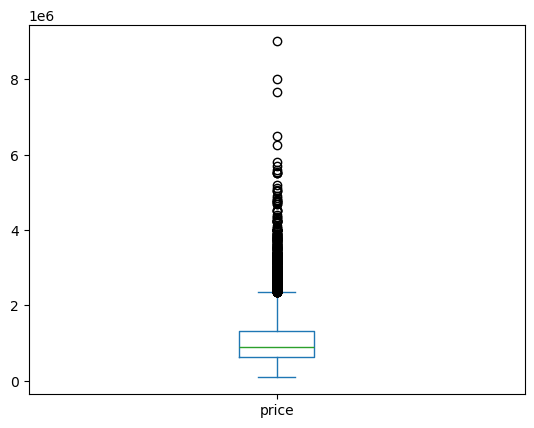

In [15]:
import matplotlib.pyplot as plt

# Detección visual de valores atípicos
df['price'].plot.box()
plt.show()

                   rooms     price  distance  postcode  bedroom_2  bathroom  \
rooms           1.000000  0.519647  0.288726  0.034040   0.840328  0.530296   
price           0.519647  1.000000 -0.137377  0.132086   0.460918  0.445324   
distance        0.288726 -0.137377  1.000000  0.387816   0.253477  0.109329   
postcode        0.034040  0.132086  0.387816  1.000000   0.027794  0.086598   
bedroom_2       0.840328  0.460918  0.253477  0.027794   1.000000  0.579963   
bathroom        0.530296  0.445324  0.109329  0.086598   0.579963  1.000000   
car             0.372825  0.240954  0.240095  0.029337   0.409243  0.327989   
land_size       0.063085  0.035708  0.103167  0.078678   0.061504  0.046932   
latitude        0.032341 -0.182571 -0.088840 -0.410900   0.019083 -0.075101   
longitude       0.072392  0.177769  0.179387  0.402290   0.090584  0.116226   
property_count -0.098154 -0.036315 -0.089547  0.068661  -0.094328 -0.051752   

                     car  land_size  latitude  long